<a href="https://colab.research.google.com/github/ltpdo/GradeData-MachineLearing/blob/Preprocessing/%E7%A7%91%E7%9B%AE%E3%81%94%E3%81%A8%E3%81%AE%E4%BB%95%E5%88%86%E3%81%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ライブラリのインポート

In [ ]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import seaborn as sns

# グラフの日本語化
!pip install japanize_matplotlib
import japanize_matplotlib

In [ ]:
# 機械学習のインポート
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingClassifier, AdaBoostRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# データの前処理

In [ ]:
# Google Driveとの接続
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/')

subject_2021 = pd.read_excel("履修成績データ2021.xlsx")
subject_2021 = subject_2021.drop(columns = ["年度", "学期", "単位数", "成績"])

subject_2021

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,学生番号,科目名,GP
0,21001,ゲームプログラミング演習,4
1,21001,Reading & WritingⅢ,3
2,21001,Listening & SpeakingⅢ,3
3,21001,韓国語Ⅰ,4
4,21001,計算機構成論Ⅱ,4
...,...,...,...
6870,21140,微分積分Ⅰ,1
6871,21140,離散数学Ⅱ,4
6872,21140,倫理学,2
6873,21140,機械工学概論,3


In [ ]:
# 科目名ごとに学生番号をカウント
subject_count = subject_2021.groupby('科目名')['学生番号'].nunique().reset_index()
count_by_subject = subject_count.rename(columns = {'学生番号': '履修者数'})
count_by_subject = count_by_subject.set_index('科目名')
count_by_subject

,履修者数
科目名,
Advanced Reading & WritingⅠ,2
Advanced Reading & WritingⅡ,3
Domestic Job Training,1
Four SkillsⅠ,13
Four SkillsⅡ,11
...,...
韓国語会話Ⅱ,3
音楽概論,6
ＡＩプログラミング演習,131


In [ ]:
# 科目名ごとに成績をカウント
gp_count_by_subject = subject_2021.groupby(['科目名', 'GP']).size().unstack(fill_value=0)
# 列の値を辞書で置き換える
gp_count_by_subject.columns = ['D', 'C', 'B', 'A', 'S']
gp_count_by_subject

,D,C,B,A,S
科目名,,,,,
Advanced Reading & WritingⅠ,0,0,1,1,0
Advanced Reading & WritingⅡ,1,0,2,0,0
Domestic Job Training,0,0,0,1,0
Four SkillsⅠ,1,0,0,1,11
Four SkillsⅡ,0,0,2,3,6
...,...,...,...,...,...
韓国語会話Ⅱ,0,0,2,0,1
音楽概論,1,0,0,2,3
ＡＩプログラミング演習,5,15,42,45,24


In [ ]:
# 結合
data_2021 = pd.merge(count_by_subject, gp_count_by_subject, left_index=True, right_index=True)
data_2021 = data_2021[data_2021["履修者数"] > 70]
data_2021 = data_2021.drop(index = [
    "Listening & SpeakingⅠ", "Listening & SpeakingⅡ", "Listening & SpeakingⅢ", "Listening & SpeakingⅣ",
    "Reading & WritingⅠ", "Reading & WritingⅡ", "Reading & WritingⅢ", "Reading & WritingⅣ"])
data_2021

,履修者数,D,C,B,A,S
科目名,,,,,,
キャリア形成基礎論,140,13,87,34,6,0
コンピュータネットワーク,104,23,15,17,27,22
スポーツ科学演習,79,6,7,6,23,38
データ構造とアルゴリズムⅠ,140,8,18,39,52,23
データ構造とアルゴリズムⅠ演習,132,9,0,5,6,112
ハードウェア実験Ⅰ,108,24,1,13,42,28
ハードウェア設計Ⅰ,127,15,18,24,27,43
ハードウェア設計Ⅱ,121,13,12,16,38,42
プログラミング入門,140,5,6,9,53,71


In [ ]:
data_2021_per = data_2021["履修者数"] / 140
data_2021_per

科目名
キャリア形成基礎論          1.000000
コンピュータネットワーク       0.742857
スポーツ科学演習           0.564286
データ構造とアルゴリズムⅠ      1.000000
データ構造とアルゴリズムⅠ演習    0.942857
ハードウェア実験Ⅰ          0.771429
ハードウェア設計Ⅰ          0.907143
ハードウェア設計Ⅱ          0.864286
プログラミング入門          1.000000
プログラミング基礎Ⅰ         1.000000
プログラミング基礎Ⅱ         0.992857
プログラミング言語とコンパイラ    0.707143
モバイルプログラミング演習      1.000000
基礎ゼミナール            1.000000
基礎数学               1.000000
基礎物理               0.842857
微分積分Ⅰ              0.964286
微分積分Ⅱ              0.750000
情報リテラシー            1.000000
情報理論・確率論           0.657143
情報科学基礎演習           1.000000
技術者倫理              0.571429
数理的教養Ⅰ             0.785714
日本語表現法             0.671429
組込みソフトウェア演習        0.557143
統計学                0.678571
線形代数Ⅰ              0.985714
線形代数Ⅱ              0.878571
計算機構成論Ⅰ            1.000000
計算機構成論Ⅱ            0.942857
離散数学Ⅰ              0.978571
離散数学Ⅱ              0.935714
離散数学Ⅲ              0.828571
離散数学Ⅳ              0.707143
ＡＩプログラミング演習        0.935714
Name: 履修者数, dtyp

In [ ]:
# 使用するデータを保存
data_2021.to_csv('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/データフレーム/科目データ.csv')

In [ ]:
# データ読み込み
data_21 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/データフレーム/科目データ(成績評価方法).xlsx')
data_21

,科目名,履修者数,D,C,B,A,S,テストの割合,小テストの割合,演習(レポート含む),単位取得率,カテゴリ,学年,科目種別,科目区分,単位区分
0,キャリア形成基礎論,140,13,87,34,6,0,40,0,60,0.907,基礎教育科目,1,講義,実践・教養・心,選択
1,コンピュータネットワーク,104,23,15,17,27,22,50,0,50,0.779,専門科目,2,講義,選択,選択
2,データ構造とアルゴリズムⅠ,140,8,18,39,52,23,60,10,30,0.943,専門科目,2,講義,必修科目,必
3,データ構造とアルゴリズムⅠ演習,132,9,0,5,6,112,60,10,30,0.932,専門科目,2,演習,必修科目,必
4,ハードウェア実験Ⅰ,108,24,1,13,42,28,0,0,100,0.808,専門科目,2,実験・実習,必修科目,必
5,ハードウェア設計Ⅰ,127,15,18,24,27,43,75,25,0,0.882,専門科目,2,講義,必修科目,必
6,ハードウェア設計Ⅱ,121,13,12,16,38,42,75,25,0,0.893,専門科目,2,講義,必修科目,必
7,プログラミング入門,140,5,6,9,53,71,0,0,100,0.964,専門科目,1,講義,必修科目,必
8,プログラミング基礎Ⅰ,140,3,19,11,29,79,60,10,30,0.979,専門科目,1,講義,必修科目,必
9,プログラミング基礎Ⅱ,139,7,20,8,26,78,60,10,30,0.950,専門科目,2,講義,必修科目,必


In [ ]:
# 少数に演算
def division_100(x):
  x = round(x / 100, 3)
  return x

# データの前処理
# 割合に変更
data_21["テストの割合"] = data_21["テストの割合"].apply(division_100)
data_21["小テストの割合"] = data_21["小テストの割合"].apply(division_100)
data_21["演習(レポート含む)"] = data_21["演習(レポート含む)"].apply(division_100)

# カテゴリ変数を数値化
lab = LabelEncoder()
lab = lab.fit(data_21["カテゴリ"])
data_21["カテゴリ"] = lab.transform(data_21["カテゴリ"])
lab = lab.fit(data_21["科目種別"])
data_21["科目種別"] = lab.transform(data_21["科目種別"])
lab = lab.fit(data_21["科目区分"])
data_21["科目区分"] = lab.transform(data_21["科目区分"])
lab = lab.fit(data_21["単位区分"])
data_21["単位区分"] = lab.transform(data_21["単位区分"])

# 科目名をindexに変更
data_21 = data_21.set_index("科目名")

data_21

,履修者数,D,C,B,A,S,テストの割合,小テストの割合,演習(レポート含む),単位取得率,カテゴリ,学年,科目種別,科目区分,単位区分
科目名,,,,,,,,,,,,,,,
キャリア形成基礎論,140,13,87,34,6,0,0.40,0.00,0.60,0.907,0,1,2,0,1
コンピュータネットワーク,104,23,15,17,27,22,0.50,0.00,0.50,0.779,1,2,2,2,1
データ構造とアルゴリズムⅠ,140,8,18,39,52,23,0.60,0.10,0.30,0.943,1,2,2,1,0
データ構造とアルゴリズムⅠ演習,132,9,0,5,6,112,0.60,0.10,0.30,0.932,1,2,1,1,0
ハードウェア実験Ⅰ,108,24,1,13,42,28,0.00,0.00,1.00,0.808,1,2,0,1,0
ハードウェア設計Ⅰ,127,15,18,24,27,43,0.75,0.25,0.00,0.882,1,2,2,1,0
ハードウェア設計Ⅱ,121,13,12,16,38,42,0.75,0.25,0.00,0.893,1,2,2,1,0
プログラミング入門,140,5,6,9,53,71,0.00,0.00,1.00,0.964,1,1,2,1,0
プログラミング基礎Ⅰ,140,3,19,11,29,79,0.60,0.10,0.30,0.979,1,1,2,1,0


In [ ]:
data_21.dtypes

履修者数            int64
D               int64
C               int64
B               int64
A               int64
S               int64
テストの割合        float64
小テストの割合       float64
演習(レポート含む)    float64
単位取得率         float64
カテゴリ            int64
学年              int64
科目種別            int64
科目区分            int64
単位区分            int64
dtype: object

In [ ]:
data_21.isna().sum()

履修者数          0
D             0
C             0
B             0
A             0
S             0
テストの割合        0
小テストの割合       0
演習(レポート含む)    0
単位取得率         0
カテゴリ          0
学年            0
科目種別          0
科目区分          0
単位区分          0
dtype: int64

# 機械学習(科目)

## 相関の確認

In [ ]:
data_21 = data_21.T
data_21

科目名,キャリア形成基礎論,コンピュータネットワーク,データ構造とアルゴリズムⅠ,データ構造とアルゴリズムⅠ演習,ハードウェア実験Ⅰ,ハードウェア設計Ⅰ,ハードウェア設計Ⅱ,プログラミング入門,プログラミング基礎Ⅰ,プログラミング基礎Ⅱ,...,離散数学Ⅲ,ＡＩプログラミング演習,スポーツ科学演習,プログラミング言語とコンパイラ,情報理論・確率論,技術者倫理,日本語表現法,組込みソフトウェア演習,統計学,離散数学Ⅳ
履修者数,140.000,104.000,140.000,132.000,108.000,127.000,121.000,140.000,140.000,139.00,...,116.000,131.000,79.000,99.00,92.000,80.000,94.000,78.000,95.000,99.000
D,13.000,23.000,8.000,9.000,24.000,15.000,13.000,5.000,3.000,7.00,...,3.000,5.000,6.000,2.00,14.000,1.000,8.000,5.000,10.000,6.000
C,87.000,15.000,18.000,0.000,1.000,18.000,12.000,6.000,19.000,20.00,...,1.000,15.000,7.000,12.00,9.000,2.000,7.000,7.000,5.000,12.000
B,34.000,17.000,39.000,5.000,13.000,24.000,16.000,9.000,11.000,8.00,...,8.000,42.000,6.000,22.00,6.000,7.000,28.000,16.000,23.000,19.000
A,6.000,27.000,52.000,6.000,42.000,27.000,38.000,53.000,29.000,26.00,...,21.000,45.000,23.000,33.00,30.000,19.000,40.000,16.000,22.000,21.000
S,0.000,22.000,23.000,112.000,28.000,43.000,42.000,71.000,79.000,78.00,...,83.000,24.000,38.000,30.00,33.000,51.000,11.000,34.000,35.000,41.000
テストの割合,0.400,0.500,0.600,0.600,0.000,0.750,0.750,0.000,0.600,0.60,...,0.800,0.000,0.200,0.00,0.800,0.200,0.400,0.000,0.800,0.400
小テストの割合,0.000,0.000,0.100,0.100,0.000,0.250,0.250,0.000,0.100,0.10,...,0.000,0.000,0.000,1.00,0.000,0.200,0.200,0.000,0.000,0.400
演習(レポート含む),0.600,0.500,0.300,0.300,1.000,0.000,0.000,1.000,0.300,0.30,...,0.200,1.000,0.800,0.00,0.200,0.600,0.600,1.000,0.200,0.200
単位取得率,0.907,0.779,0.943,0.932,0.808,0.882,0.893,0.964,0.979,0.95,...,0.974,0.962,0.924,0.98,0.848,0.988,0.915,0.936,0.895,0.939


In [ ]:
data_21.corr()

科目名,キャリア形成基礎論,コンピュータネットワーク,データ構造とアルゴリズムⅠ,データ構造とアルゴリズムⅠ演習,ハードウェア実験Ⅰ,ハードウェア設計Ⅰ,ハードウェア設計Ⅱ,プログラミング入門,プログラミング基礎Ⅰ,プログラミング基礎Ⅱ,...,離散数学Ⅲ,ＡＩプログラミング演習,スポーツ科学演習,プログラミング言語とコンパイラ,情報理論・確率論,技術者倫理,日本語表現法,組込みソフトウェア演習,統計学,離散数学Ⅳ
科目名,,,,,,,,,,,,,,,,,,,,,
キャリア形成基礎論,1.000000,0.843005,0.827153,0.565383,0.729874,0.827311,0.780715,0.678276,0.731585,0.736472,...,0.614299,0.823012,0.729523,0.802556,0.762658,0.646284,0.790204,0.771264,0.772774,0.792653
コンピュータネットワーク,0.843005,1.000000,0.971391,0.804068,0.980334,0.984118,0.980631,0.927821,0.917558,0.920053,...,0.861327,0.965407,0.948215,0.969624,0.977980,0.889171,0.960333,0.957247,0.972021,0.963366
データ構造とアルゴリズムⅠ,0.827153,0.971391,1.000000,0.746684,0.961653,0.965117,0.968530,0.920457,0.892078,0.885415,...,0.828306,0.998201,0.926585,0.986896,0.951163,0.868050,0.995253,0.944723,0.963636,0.951214
データ構造とアルゴリズムⅠ演習,0.565383,0.804068,0.746684,1.000000,0.811104,0.880230,0.874889,0.917464,0.958038,0.960498,...,0.987910,0.756839,0.929768,0.837878,0.877932,0.971715,0.704247,0.921060,0.888814,0.911991
ハードウェア実験Ⅰ,0.729874,0.980334,0.961653,0.811104,1.000000,0.964029,0.982325,0.953930,0.913488,0.913246,...,0.876292,0.953310,0.956904,0.964980,0.984755,0.905267,0.961724,0.947773,0.965778,0.949793
ハードウェア設計Ⅰ,0.827311,0.984118,0.965117,0.880230,0.964029,1.000000,0.992029,0.960708,0.967468,0.967249,...,0.926183,0.966172,0.979114,0.985918,0.983519,0.946162,0.942812,0.991959,0.993574,0.995122
ハードウェア設計Ⅱ,0.780715,0.980631,0.968530,0.874889,0.982325,0.992029,1.000000,0.981909,0.968087,0.966461,...,0.930577,0.965164,0.989219,0.990351,0.996397,0.954167,0.952439,0.985945,0.988817,0.989082
プログラミング入門,0.678276,0.927821,0.920457,0.917464,0.953930,0.960708,0.981909,1.000000,0.981283,0.977433,...,0.966385,0.917821,0.994768,0.966223,0.982228,0.983193,0.901056,0.973962,0.965202,0.973658
プログラミング基礎Ⅰ,0.731585,0.917558,0.892078,0.958038,0.913488,0.967468,0.968087,0.981283,1.000000,0.999186,...,0.985229,0.894705,0.991252,0.951123,0.965495,0.991926,0.856682,0.983683,0.963465,0.983773


In [ ]:
data_21.columns

Index(['キャリア形成基礎論', 'コンピュータネットワーク', 'データ構造とアルゴリズムⅠ', 'データ構造とアルゴリズムⅠ演習',
       'ハードウェア実験Ⅰ', 'ハードウェア設計Ⅰ', 'ハードウェア設計Ⅱ', 'プログラミング入門', 'プログラミング基礎Ⅰ',
       'プログラミング基礎Ⅱ', 'モバイルプログラミング演習', '基礎ゼミナール', '基礎数学', '基礎物理', '微分積分Ⅰ',
       '微分積分Ⅱ', '情報リテラシー', '情報科学基礎演習', '数理的教養Ⅰ', '線形代数Ⅰ', '線形代数Ⅱ', '計算機構成論Ⅰ',
       '計算機構成論Ⅱ', '離散数学Ⅰ', '離散数学Ⅱ', '離散数学Ⅲ', 'ＡＩプログラミング演習', 'スポーツ科学演習',
       'プログラミング言語とコンパイラ', '情報理論・確率論', '技術者倫理', '日本語表現法', '組込みソフトウェア演習', '統計学',
       '離散数学Ⅳ'],
      dtype='object', name='科目名')

## 重回帰分析

In [188]:
# 目的変数と説明変数
X = data_21.drop([
    # 1年後期
    "プログラミング基礎Ⅰ", "モバイルプログラミング演習", "基礎物理", "微分積分Ⅰ", "線形代数Ⅱ", "計算機構成論Ⅰ", "離散数学Ⅱ",
    "情報科学基礎演習",
    # 2年前期
    "ハードウェア設計Ⅰ", "プログラミング基礎Ⅱ", "微分積分Ⅱ", "計算機構成論Ⅱ", "離散数学Ⅲ", "ＡＩプログラミング演習",
    "統計学", "情報理論・確率論", "組込みソフトウェア演習", "日本語表現法",
    # 2年後期
    "データ構造とアルゴリズムⅠ演習", "ハードウェア実験Ⅰ", "データ構造とアルゴリズムⅠ", "コンピュータネットワーク", "ハードウェア設計Ⅱ",
    "技術者倫理",
    # 3年前期
    "離散数学Ⅳ",
    ], axis = 1)
y = data_21["キャリア形成基礎論"]

# 訓練データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# モデル
model = LinearRegression()
model.fit(X_train, y_train)

# 決定係数を表示
print("決定係数(train):{:.3f}".format(model.score(X_train, y_train)))
print("決定係数(test):{:.3f}".format(model.score(X_test, y_test)))

# 回帰係数と切片を表示
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients_sorted = coefficients.abs().sort_values(ascending=False)
print("\n回帰係数(降順)\n{}".format(coefficients_sorted))
print("切片: {:.3f}".format(model.intercept_))

決定係数(train):1.000
決定係数(test):0.748

回帰係数(降順)
科目名
基礎数学               1.749544
プログラミング言語とコンパイラ    1.695471
プログラミング入門          1.474770
スポーツ科学演習           1.127043
基礎ゼミナール            0.861640
線形代数Ⅰ              0.827098
日本語表現法             0.764350
数理的教養Ⅰ             0.716559
離散数学Ⅳ              0.692566
組込みソフトウェア演習        0.463237
技術者倫理              0.460031
情報科学基礎演習           0.298100
情報リテラシー            0.263935
キャリア形成基礎論          0.253387
離散数学Ⅰ              0.163227
dtype: float64
切片: 0.880


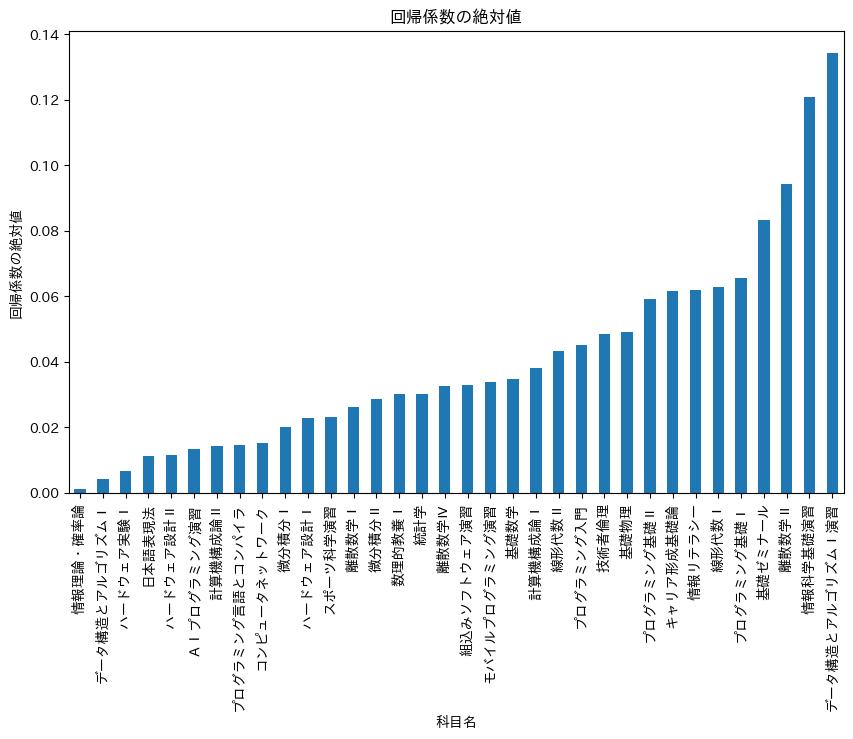

In [ ]:
# 回帰係数を棒グラフで表示
plt.figure(figsize=(10, 6))
abs_coefficients = abs(pd.Series(model.coef_, index=X.columns))
abs_coefficients.sort_values().plot(kind='bar')
plt.title('回帰係数の絶対値')
plt.xlabel('科目名')
plt.ylabel('回帰係数の絶対値')
plt.xticks(rotation=90)
plt.show()

### 重回帰分析のすべての科目の決定係数を調べる

In [ ]:
# すべての科目
subject_names = [
  'キャリア形成基礎論', 'コンピュータネットワーク', 'データ構造とアルゴリズムⅠ', 'データ構造とアルゴリズムⅠ演習',
  'ハードウェア実験Ⅰ', 'ハードウェア設計Ⅰ', 'ハードウェア設計Ⅱ', 'プログラミング入門', 'プログラミング基礎Ⅰ',
  'プログラミング基礎Ⅱ', 'モバイルプログラミング演習', '基礎ゼミナール', '基礎数学', '基礎物理', '微分積分Ⅰ',
  '微分積分Ⅱ', '情報リテラシー', '情報科学基礎演習', '数理的教養Ⅰ', '線形代数Ⅰ', '線形代数Ⅱ', '計算機構成論Ⅰ',
  '計算機構成論Ⅱ', '離散数学Ⅰ', '離散数学Ⅱ', '離散数学Ⅲ', 'ＡＩプログラミング演習', 'スポーツ科学演習', 'プログラミング言語とコンパイラ',
  '情報理論・確率論', '技術者倫理', '日本語表現法', '組込みソフトウェア演習', '統計学', '離散数学Ⅳ']

# スコアを保存
scores = {}

# 回帰係数を保存
regression_coefficient = {}

for subject in subject_names:
  # 目的変数と説明変数
  X = data_21.drop(subject, axis = 1)
  y = data_21[subject]

  # 訓練データとテストデータ
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

  # モデル
  model = LinearRegression()
  model.fit(X_train, y_train)

  # スコアを格納
  scores[(subject, "train_score")] = model.score(X_train, y_train)
  scores[(subject, "test_score")] = model.score(X_test, y_test)

  # 回帰係数を格納
  regression_coefficient[(subject, "回帰係数")] = pd.Series(model.coef_, index = X.columns)
  regression_coefficient[(subject, "切片")] = round(model.intercept_, 3)

# 結果を表示
pd.Series(scores).unstack()
#pd.Series(regression_coefficient).unstack()

,test_score,train_score
キャリア形成基礎論,0.968467,1.0
コンピュータネットワーク,0.998446,1.0
スポーツ科学演習,0.545641,1.0
データ構造とアルゴリズムⅠ,0.868844,1.0
データ構造とアルゴリズムⅠ演習,0.982629,1.0
ハードウェア実験Ⅰ,0.981731,1.0
ハードウェア設計Ⅰ,0.953942,1.0
ハードウェア設計Ⅱ,0.974449,1.0
プログラミング入門,0.560612,1.0
プログラミング基礎Ⅰ,0.342716,1.0


In [ ]:
# 決定係数を保存
df_scores = pd.Series(scores).unstack()
df_scores
df_scores.to_csv('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/データフレーム/科目ごとの決定係数.csv')

In [ ]:
# 回帰係数を保存
df_regression_coefficient = pd.Series(regression_coefficient).unstack()
df_regression_coefficient
df_regression_coefficient.to_csv('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/データフレーム/科目ごとの回帰係数.csv')

## 決定木

In [ ]:
# 目的変数と説明変数
X = data_21.drop("モバイルプログラミング演習", axis = 1)
y = data_21["モバイルプログラミング演習"]

# 訓練データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# モデル
model = DecisionTreeRegressor(criterion = "squared_error", max_depth = 1, random_state = 0)
model.fit(X_train, y_train)

# 決定係数を表示
print("決定係数(train):{:.3f}".format(model.score(X_train, y_train)))
print("決定係数(test):{:.3f}".format(model.score(X_test, y_test)))

決定係数(train):0.798
決定係数(test):-3.142


## ランダムフォレスト

In [ ]:
# 目的変数と説明変数
X = data_21.drop("データ構造とアルゴリズムⅠ", axis = 1)
y = data_21["データ構造とアルゴリズムⅠ"]

# 訓練データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# モデル
model = RandomForestRegressor(random_state = 0)
model.fit(X_train, y_train)

# 決定係数を表示
print("決定係数(train):{:.3f}".format(model.score(X_train, y_train)))
print("決定係数(test):{:.3f}".format(model.score(X_test, y_test)))

決定係数(train):0.924
決定係数(test):0.278


In [ ]:
# モデルの学習時に使用された特徴量の名前を取得
feature_names = X.columns

# データフレームからモデルの学習に使用されなかった列を削除
data_21_reduced = data_21[feature_names]

# 不要な列を削除
data_21_reduced = data_21.drop("コンピュターネットワーク", axis=1)  # 不要な列の名前を指定して削除

# モデルの特徴量の重要度を取得
importances = model.feature_importances_

# 特徴量の重要度を DataFrame に変換
feature_importances_df = pd.DataFrame(importances, index=data_21_reduced.columns, columns=['Importance'])

# グラフで表示
plt.figure(figsize=(10, 6))
feature_importances_df.sort_values(by='Importance', ascending=False).plot(kind='bar', color='skyblue')
plt.title('各特徴量の重要度')
plt.xlabel('特徴量')
plt.ylabel('重要度')
plt.show()


KeyError: "['コンピュターネットワーク'] not found in axis"

# 機械学習(評価内容)

## 相関の確認

In [ ]:
data_21.corr()

科目名,キャリア形成基礎論,コンピュータネットワーク,データ構造とアルゴリズムⅠ,データ構造とアルゴリズムⅠ演習,ハードウェア実験Ⅰ,ハードウェア設計Ⅰ,ハードウェア設計Ⅱ,プログラミング入門,プログラミング基礎Ⅰ,プログラミング基礎Ⅱ,...,離散数学Ⅲ,ＡＩプログラミング演習,スポーツ科学演習,プログラミング言語とコンパイラ,情報理論・確率論,技術者倫理,日本語表現法,組込みソフトウェア演習,統計学,離散数学Ⅳ
科目名,,,,,,,,,,,,,,,,,,,,,
キャリア形成基礎論,1.000000,0.843005,0.827153,0.565383,0.729874,0.827311,0.780715,0.678276,0.731585,0.736472,...,0.614299,0.823012,0.729523,0.802556,0.762658,0.646284,0.790204,0.771264,0.772774,0.792653
コンピュータネットワーク,0.843005,1.000000,0.971391,0.804068,0.980334,0.984118,0.980631,0.927821,0.917558,0.920053,...,0.861327,0.965407,0.948215,0.969624,0.977980,0.889171,0.960333,0.957247,0.972021,0.963366
データ構造とアルゴリズムⅠ,0.827153,0.971391,1.000000,0.746684,0.961653,0.965117,0.968530,0.920457,0.892078,0.885415,...,0.828306,0.998201,0.926585,0.986896,0.951163,0.868050,0.995253,0.944723,0.963636,0.951214
データ構造とアルゴリズムⅠ演習,0.565383,0.804068,0.746684,1.000000,0.811104,0.880230,0.874889,0.917464,0.958038,0.960498,...,0.987910,0.756839,0.929768,0.837878,0.877932,0.971715,0.704247,0.921060,0.888814,0.911991
ハードウェア実験Ⅰ,0.729874,0.980334,0.961653,0.811104,1.000000,0.964029,0.982325,0.953930,0.913488,0.913246,...,0.876292,0.953310,0.956904,0.964980,0.984755,0.905267,0.961724,0.947773,0.965778,0.949793
ハードウェア設計Ⅰ,0.827311,0.984118,0.965117,0.880230,0.964029,1.000000,0.992029,0.960708,0.967468,0.967249,...,0.926183,0.966172,0.979114,0.985918,0.983519,0.946162,0.942812,0.991959,0.993574,0.995122
ハードウェア設計Ⅱ,0.780715,0.980631,0.968530,0.874889,0.982325,0.992029,1.000000,0.981909,0.968087,0.966461,...,0.930577,0.965164,0.989219,0.990351,0.996397,0.954167,0.952439,0.985945,0.988817,0.989082
プログラミング入門,0.678276,0.927821,0.920457,0.917464,0.953930,0.960708,0.981909,1.000000,0.981283,0.977433,...,0.966385,0.917821,0.994768,0.966223,0.982228,0.983193,0.901056,0.973962,0.965202,0.973658
プログラミング基礎Ⅰ,0.731585,0.917558,0.892078,0.958038,0.913488,0.967468,0.968087,0.981283,1.000000,0.999186,...,0.985229,0.894705,0.991252,0.951123,0.965495,0.991926,0.856682,0.983683,0.963465,0.983773


In [ ]:
data_21.columns

Index(['キャリア形成基礎論', 'コンピュータネットワーク', 'データ構造とアルゴリズムⅠ', 'データ構造とアルゴリズムⅠ演習',
       'ハードウェア実験Ⅰ', 'ハードウェア設計Ⅰ', 'ハードウェア設計Ⅱ', 'プログラミング入門', 'プログラミング基礎Ⅰ',
       'プログラミング基礎Ⅱ', 'モバイルプログラミング演習', '基礎ゼミナール', '基礎数学', '基礎物理', '微分積分Ⅰ',
       '微分積分Ⅱ', '情報リテラシー', '情報科学基礎演習', '数理的教養Ⅰ', '線形代数Ⅰ', '線形代数Ⅱ', '計算機構成論Ⅰ',
       '計算機構成論Ⅱ', '離散数学Ⅰ', '離散数学Ⅱ', '離散数学Ⅲ', 'ＡＩプログラミング演習', 'スポーツ科学演習',
       'プログラミング言語とコンパイラ', '情報理論・確率論', '技術者倫理', '日本語表現法', '組込みソフトウェア演習', '統計学',
       '離散数学Ⅳ'],
      dtype='object', name='科目名')

## 重回帰分析

In [ ]:
# 目的変数と説明変数
X = data_21.drop("テストの割合", axis = 1)
y = data_21["テストの割合"]

# 訓練データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

# モデル
model = LinearRegression()
model.fit(X_train, y_train)

# 決定係数を表示
print("決定係数(train):{:.3f}".format(model.score(X_train, y_train)))
print("決定係数(test):{:.3f}".format(model.score(X_test, y_test)))

# 回帰係数と切片を表示
print("\n回帰係数\n{}".format(pd.Series(model.coef_, index = X.columns)))
print("切片: {:.3f}".format(model.intercept_))

KeyError: "['テストの割合'] not found in axis"

## 決定木

In [ ]:
# 目的変数と説明変数
X = data_21.drop("テストの割合", axis = 1)
y = data_21["テストの割合"]

# 訓練データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# モデル
model = DecisionTreeRegressor(criterion = "squared_error", max_depth = 5, random_state = 0)
model.fit(X_train, y_train)

# 決定係数を表示
print("決定係数(train):{:.3f}".format(model.score(X_train, y_train)))
print("決定係数(test):{:.3f}".format(model.score(X_test, y_test)))

決定係数(train):1.000
決定係数(test):0.677


## ランダムフォレスト

In [ ]:
# 目的変数と説明変数
X = data_21.drop("テストの割合", axis = 1)
y = data_21["テストの割合"]

# 訓練データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# モデル
model = RandomForestRegressor(random_state = 0)
model.fit(X_train, y_train)

# 決定係数を表示
print("決定係数(train):{:.3f}".format(model.score(X_train, y_train)))
print("決定係数(test):{:.3f}".format(model.score(X_test, y_test)))

決定係数(train):0.969
決定係数(test):0.378


# 機械学習(その他の科目)


In [ ]:
# その他の科目を調べる
data_2021 = pd.merge(count_by_subject, gp_count_by_subject, left_index=True, right_index=True)
data_2021 = data_2021[data_2021["履修者数"] < 70]
data_2021

,履修者数,D,C,B,A,S
科目名,,,,,,
Advanced Reading & WritingⅠ,2,0,0,1,1,0
Advanced Reading & WritingⅡ,3,1,0,2,0,0
Domestic Job Training,1,0,0,0,1,0
Four SkillsⅠ,13,1,0,0,1,11
Four SkillsⅡ,11,0,0,2,3,6
...,...,...,...,...,...,...
韓国語会話Ⅰ,33,0,5,9,8,11
韓国語会話Ⅱ,3,0,0,2,0,1
音楽概論,6,1,0,0,2,3
